# **PREETHAM G**

# **Prediction Using Supervised ML**





### Importing the libraries and data 

In [1]:
#We have to import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#import necessary libraries required for prediction
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
#read the data from the directory
data1=pd.read_csv("G:/Preetham.G/internship/student_scores.csv")
data1

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
#since there is no nan or missing values data cleaning step can be skipped

#to understand the data use describe function
data1.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Data visualization

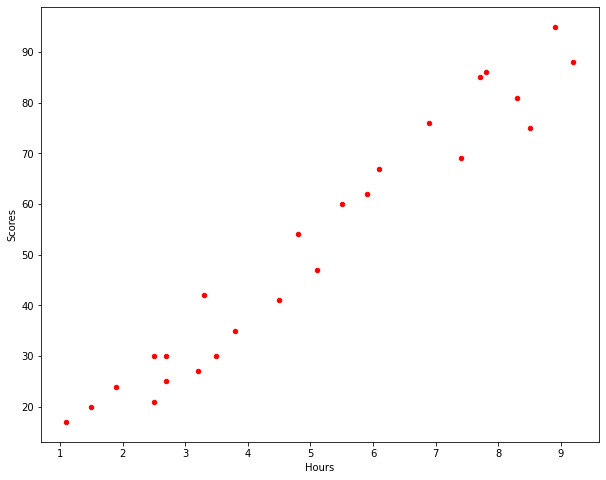

In [4]:
data1.plot(kind="scatter",x="Hours",y="Scores",color="red",figsize=(10,8))
plt.show()

### Linear regression

In [5]:
#separating input and output features
x=data1.iloc[:,:-1].values
y=data1.iloc[:,1].values

#splitting data into test and train
x_train, x_test, y_train, y_test= train_test_split(x, y,train_size=0.70,test_size=0.30,random_state=0)
print(x_train.shape, x_test.shape,y_train.shape,y_test.shape)

(17, 1) (8, 1) (17,) (8,)


In [6]:
#baseline model
base_pred=np.mean(y_test)
print(base_pred)

base_pred=np.repeat(base_pred,len(y_test))
print(base_pred)

44.125
[44.125 44.125 44.125 44.125 44.125 44.125 44.125 44.125]


In [7]:
#finding root mean square error (cost function)
base_rmse=np.sqrt(mean_squared_error(y_test,base_pred))
print(base_rmse)

23.062076554378187


In [8]:
#setting intercept as true
lgr= LinearRegression(fit_intercept=True)

#model
model=lgr.fit(x_train, y_train)

#predicting model on test set
scores_pred=lgr.predict(x_test)

In [9]:
linear_rmse=np.sqrt(mean_squared_error(y_test,scores_pred))
print(linear_rmse)

4.792191274636315


In [10]:
# R squared value
r2_train=model.score(x_train,y_train)
r2_test=model.score(x_test,y_test)
print(r2_train,r2_test)

0.9484997422695115 0.9568211104435257


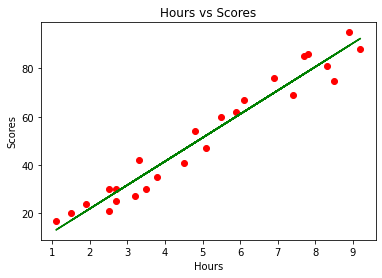

In [11]:
line = lgr.coef_*x+lgr.intercept_
# Plotting for the test data
plt.scatter(x, y,color= "red")
plt.plot(x, line,color="green");
plt.title("Hours vs Scores")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

In [12]:
data1= pd.DataFrame({'Actual': y_test,'Predicted': scores_pred})
data1

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


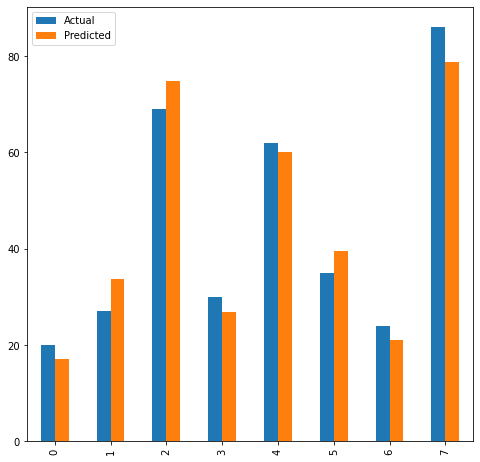

In [13]:
data1.plot(kind="bar",figsize=(8,8))
plt.show()

In [13]:
print('Score of student who studied for 9.25 hours a dat', lgr.predict([[9.25]]))

Score of student who studied for 9.25 hours a dat [92.91505723]
